# <a name="voltar">Índice</a>

[Contexto](#1)

[Descrição dos dados](#2)

[Exploração dos dados](#3)

[Transformação e limpeza de dados](#4)

[Visualização dos dados](#5)

[Análise Univariada](#6)

[Análise Bivariada](#7)

[Conclusão](#8)

# <a name="1">Contexto</a>


O dataset a ser analisado contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de default, que indica se um cliente é adimplente(default = 0), ou inadimplente (default = 1), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira.

Abaixo uma descrição completa deste atributos:



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



#  <a>Entendimento dos dados</a>
[Voltar ao Topo](#voltar)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, shapiro, kstest, norm
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/credito.csv', na_values=['na'], keep_default_na=False)

## <a name="2">Descrição dos dados</a> 
[Voltar ao Topo](#voltar)

In [4]:
df.shape

(10127, 16)

In [5]:
df.head(5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

## <a name="3">Exploração dos dados</a>
[Voltar ao Topo](#voltar)

### Verificando proposção de inadiplentes inicial

In [ ]:
qtd_total = df.shape[0]
qtd_adimplentes = df[df['default'] == 0].shape[0]
qtd_inadimplentes = df[df['default'] == 1].shape[0]
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


### Verificando atributos categóricos

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


>obs: limite_credito e valor_transacoes_12m não são categóricos

### Verificando atributos numéricos.

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### Verificando dados faltantes

In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [ ]:
# Função para iterar entre as colunas e retornar quantidade e percentual de nulos nas colunas com nulos

def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd = df[df[col].isna()].shape[0]
      total = df.shape[0]
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [ ]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [ ]:
print("Dados faltantes dos inadiplentes")
stats_dados_faltantes(df=df[df['default'] == 0])

Dados faltantes dos inadiplentes
{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [ ]:
print("Dados faltantes dos inadiplentes")
stats_dados_faltantes(df=df[df['default'] == 1])

Dados faltantes dos inadiplentes
{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


>obs: Os dados faltantes parecem balenceados em em ambas as categorias de adiplentes e inadiplentes

## <a name = "4">Transformação e limpeza de dados</a>
[Voltar ao Topo](#voltar)

### Correção de schema

* Corrigindo limite_credito e valor_transacoes_12m

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


>No caso houve um erro de interpretação entre os ponts e as vírgulas devido a notação brasileira, será criada uma função para subistituí-los, trocando os pontos por nada e as virgulas por ponto

In [ ]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

In [ ]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

* Resultado após a conversão

In [ ]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

* Atributos categóricos.

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


* Atributos numéricos.

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### Tratamento de dados faltantes

* Verificando dados faltantes nas variáveis categóricas

In [ ]:
cat_faltantes = df.select_dtypes('object').columns[df.select_dtypes('object').isna().any()]
print(cat_faltantes.values)

['escolaridade' 'estado_civil' 'salario_anual']


* Verificando dados faltantes nas variáveis numéricas

In [ ]:
num_faltantes = df.select_dtypes('number').columns[df.select_dtypes('number').isna().any()]
print(num_faltantes.values)

[]


>Como apenas as variáveis categóricas apresentaram dados faltantes, para verificar se os nulos serão dropados irei realizar o teste estatísticos Qui-Quadrado para verificar se a proporção de valores ausentes nas variáveis categóricas é significativamente diferente entre as categorias da variável alvo.

### Teste Qui-Quadrado

In [ ]:
#Função para executar o teste
def teste_chi_quadrado(df, cat_faltantes):
    list_dropar = []
    list_n_dropar = []
    for a in cat_faltantes:
        contingency_table = pd.crosstab(df[a], df['default'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"Estatística Qui-Quadrado para {a}: {round(chi2,4)}")
        print(f"Valor p para {a}: {round(p,4)}")
        alpha = 0.05
        if p < alpha:
            list_n_dropar.append(a)
        else:
            list_dropar.append(a)
        print()
    print(f"As variáveis {list_n_dropar} APRESENTARAM significancia estatística")
    print(f"As variáveis {list_dropar} NÃO apresentaram significancia estatística")


In [ ]:
teste_chi_quadrado(df, ['salario_anual','estado_civil','escolaridade'])

Estatística Qui-Quadrado para salario_anual: 12.3681
Valor p para salario_anual: 0.0148

Estatística Qui-Quadrado para estado_civil: 5.2778
Valor p para estado_civil: 0.0714

Estatística Qui-Quadrado para escolaridade: 9.8917
Valor p para escolaridade: 0.0423

As variáveis ['salario_anual', 'escolaridade'] APRESENTARAM significancia estatística
As variáveis ['estado_civil'] NÃO apresentaram significancia estatística


* Verificando a proporção dos dados

In [ ]:
#Função para calcular as proporções
def proporcao_categorias(df, coluna):
    _total = len(df[coluna])
    for a in range(len(list(df[coluna].value_counts().values))):
        proporcao = list(df[coluna].value_counts().values)[a] / _total
        print(f"{list(df[coluna].value_counts().keys())[a]} - {proporcao*100:.2f} %")


In [ ]:
print('-'*30)
print('Proporção de salário anual')
print('-'*30)
print(proporcao_categorias(df, 'salario_anual'))
print()
print('-'*30)
print('Proporção de escolaridade')
print('-'*30)
print(proporcao_categorias(df, 'escolaridade'))
print('-'*30)
print('Proporção de estado_civil')
print('-'*30)
print(proporcao_categorias(df, 'estado_civil'))

------------------------------
Proporção de salário anual
------------------------------
menos que $40K - 35.16 %
$40K - $60K - 17.68 %
$80K - $120K - 15.16 %
$60K - $80K - 13.84 %
$120K + - 7.18 %
None

------------------------------
Proporção de escolaridade
------------------------------
mestrado - 30.89 %
ensino medio - 19.88 %
sem educacao formal - 14.68 %
graduacao - 10.00 %
doutorado - 9.55 %
None
------------------------------
Proporção de estado_civil
------------------------------
casado - 46.28 %
solteiro - 38.94 %
divorciado - 7.39 %
None


### Tratamento dos nulos

* Preenchendo com a moda:
Irei preencher os nulos com a moda e verificar se isso gerou impacto significativo na variável alvo

In [ ]:
df_alterado = df.copy()

In [ ]:
df_alterado['escolaridade'] = df_alterado['escolaridade'].fillna(df_alterado['escolaridade'].mode().iloc[0])
df_alterado['salario_anual'] = df_alterado['salario_anual'].fillna(df_alterado['salario_anual'].mode().iloc[0])
df_alterado['estado_civil'] = df_alterado['estado_civil'].fillna(df_alterado['estado_civil'].mode().iloc[0])
print(df_alterado.isnull().sum())

id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64


In [ ]:
teste_chi_quadrado(df_alterado, ['salario_anual','estado_civil','escolaridade'])

Estatística Qui-Quadrado para salario_anual: 12.7464
Valor p para salario_anual: 0.0126

Estatística Qui-Quadrado para estado_civil: 3.9521
Valor p para estado_civil: 0.1386

Estatística Qui-Quadrado para escolaridade: 9.3934
Valor p para escolaridade: 0.052

As variáveis ['salario_anual'] APRESENTARAM significancia estatística
As variáveis ['estado_civil', 'escolaridade'] NÃO apresentaram significancia estatística


In [ ]:
print('-'*30)
print('Proporção de salário anual')
print('-'*30)
print(proporcao_categorias(df_alterado, 'salario_anual'))
print()
print('-'*30)
print('Proporção de escolaridade')
print('-'*30)
print(proporcao_categorias(df_alterado, 'escolaridade'))
print('-'*30)
print('Proporção de estado_civil')
print('-'*30)
print(proporcao_categorias(df_alterado, 'estado_civil'))

------------------------------
Proporção de salário anual
------------------------------
menos que $40K - 46.14 %
$40K - $60K - 17.68 %
$80K - $120K - 15.16 %
$60K - $80K - 13.84 %
$120K + - 7.18 %
None

------------------------------
Proporção de escolaridade
------------------------------
mestrado - 45.89 %
ensino medio - 19.88 %
sem educacao formal - 14.68 %
graduacao - 10.00 %
doutorado - 9.55 %
None
------------------------------
Proporção de estado_civil
------------------------------
casado - 53.68 %
solteiro - 38.94 %
divorciado - 7.39 %
None


* Dropando nulos: Irei preencher os nulos com a moda e verificar se isso gerou impacto significativo na variável alvo

In [ ]:
df_dropados = df.copy()

In [ ]:
df_dropados=df_dropados.dropna()
print(df_dropados.isnull().sum())

id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64


In [ ]:
teste_chi_quadrado(df_dropados, ['salario_anual','estado_civil','escolaridade'])

Estatística Qui-Quadrado para salario_anual: 12.3119
Valor p para salario_anual: 0.0152

Estatística Qui-Quadrado para estado_civil: 4.247
Valor p para estado_civil: 0.1196

Estatística Qui-Quadrado para escolaridade: 9.9449
Valor p para escolaridade: 0.0414

As variáveis ['salario_anual', 'escolaridade'] APRESENTARAM significancia estatística
As variáveis ['estado_civil'] NÃO apresentaram significancia estatística


In [ ]:
print('-'*30)
print('Proporção de salário anual')
print('-'*30)
print(proporcao_categorias(df_dropados, 'salario_anual'))
print()
print('-'*30)
print('Proporção de escolaridade')
print('-'*30)
print(proporcao_categorias(df_dropados, 'escolaridade'))
print('-'*30)
print('Proporção de estado_civil')
print('-'*30)
print(proporcao_categorias(df_dropados, 'estado_civil'))

------------------------------
Proporção de salário anual
------------------------------
menos que $40K - 39.43 %
$40K - $60K - 19.94 %
$80K - $120K - 16.98 %
$60K - $80K - 15.58 %
$120K + - 8.08 %
None

------------------------------
Proporção de escolaridade
------------------------------
mestrado - 36.59 %
ensino medio - 23.34 %
sem educacao formal - 17.00 %
graduacao - 11.92 %
doutorado - 11.14 %
None
------------------------------
Proporção de estado_civil
------------------------------
casado - 50.33 %
solteiro - 41.63 %
divorciado - 8.04 %
None


In [ ]:
qtd_total_novo, _ = df_alterado.shape
qtd_adimplentes_novo, _ = df_alterado[df_alterado['default'] == 0].shape
qtd_inadimplentes_novo, _ = df_alterado[df_alterado['default'] == 1].shape

qtd_total_dropados, _ = df_dropados.shape
qtd_adimplentes_dropados, _ = df_dropados[df_dropados['default'] == 0].shape
qtd_inadimplentes_dropados, _ = df_dropados[df_dropados['default'] == 1].shape

In [ ]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão de clientes adimplentes preenchida com a moda é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print(f"A proporcão de clientes adimplentes com nulos dropados é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A proporcão de clientes inadimplentes preenchida com a moda é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")
print(f"A proporcão de clientes inadimplentes com nulos dropados é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A proporcão de clientes adimplentes preenchida com a moda é de 83.93%
A proporcão de clientes adimplentes com nulos dropados é de 83.93%

A proporcão clientes inadimplentes é de 16.07%
A proporcão de clientes inadimplentes preenchida com a moda é de 16.07%
A proporcão de clientes inadimplentes com nulos dropados é de 16.07%


>**Conclusão:**

>Teste Qui-Quadrado:
Os resultados dos testes Qui-Quadrado para salário anual, estado civil e escolaridade após o drop dos dados faltantes permaneceram semelhantes aos resultados antes da alteração. Isso sugere que a distribuição das variáveis categóricas não foi significativamente afetada pela remoção dos dados faltantes.

>Proporções:
Após a remoção dos dados faltantes, as proporções de salário anual e estado civil foram ligeiramente alteradas, enquanto a proporção de escolaridade também foi afetada, mas de forma menos significativa em comparação com o preenchimento dos dados faltantes com a moda.
Portanto, com base nessas observações, podemos concluir que apesar de nenhuma das abordagens afetar a variável alvo, a abordagem de dropar os dados faltantes teve um impacto ligeiramente menor nas variáveis categóricas do conjunto de dados em comparação com o preenchimento dos dados faltantes com a moda.

>Desta forma seguirei a análise com a base de dados com os nulos dropados.

# <a name="5">Visualização dos dados</a>

## <a name="6">Análise Univariada</a>
[Voltar ao Topo](#voltar)

### Dados categóricos

In [ ]:
sns.set_style("whitegrid")

In [ ]:
df_adimplente = df_dropados[df_dropados['default'] == 0]
df_inadimplente = df_dropados[df_dropados['default'] == 1]
categorical_columns = list(df_dropados.select_dtypes('object').columns)
categorical_columns

['sexo', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao']

In [ ]:
def plotar_grafico_por_coluna(df, coluna, titulos):
    eixo = 0
    max_y = 0
    max_freq = df[0].select_dtypes('object').describe()[coluna]['freq'] * 1.1

    figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

    for dataframe, titulo in zip(df, titulos):
        df_to_plot = dataframe[coluna].value_counts().to_frame()
        df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
        df_to_plot[coluna] = df_to_plot.index
        df_to_plot.sort_values(by=[coluna], inplace=True)

        f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
        f.set(title=titulo, xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
        f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        # Adicionando percentuais sobre as barras
        for i in range(len(df_to_plot)):
            f.text(x=i, y=df_to_plot['frequencia_absoluta'].iloc[i],
                   s=f"{df_to_plot['frequencia_absoluta'].iloc[i] / len(dataframe) * 100:.2f}%",
                   ha='center', va='bottom')

        eixo += 1

    figura.tight_layout()
    plt.show()

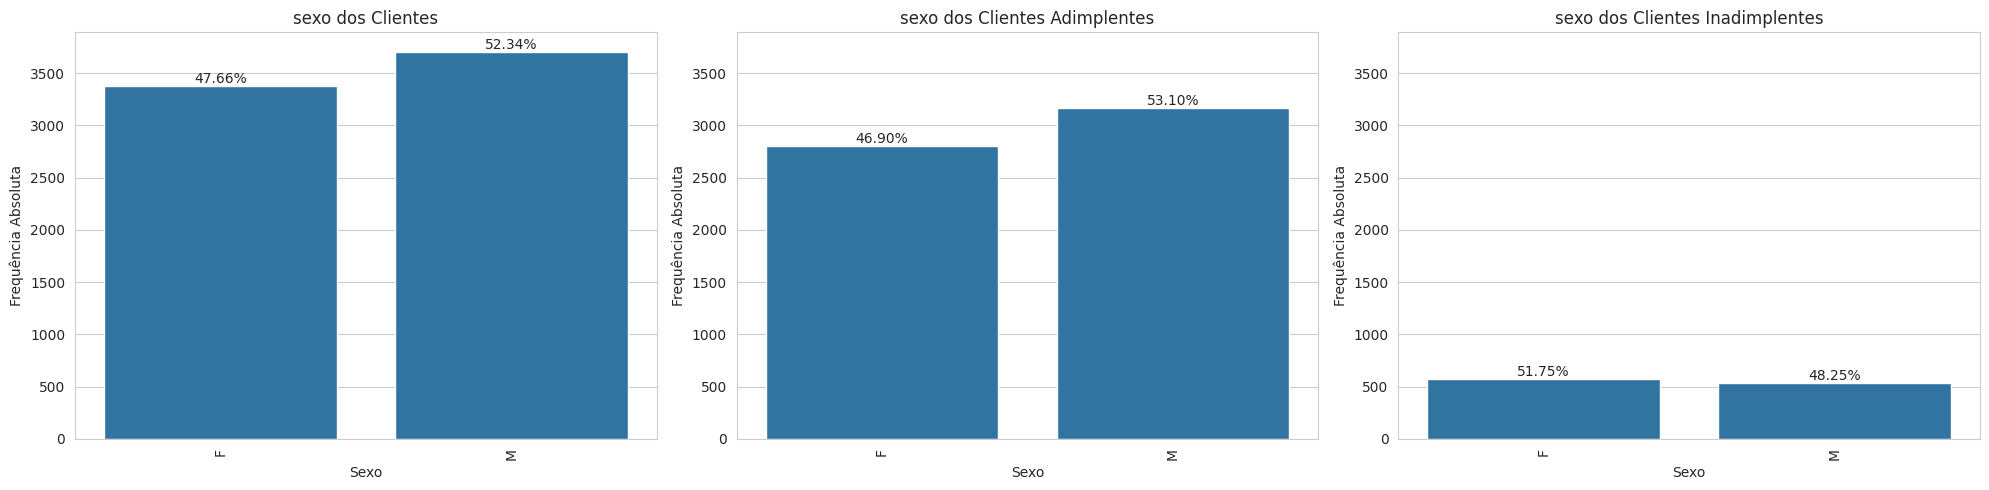

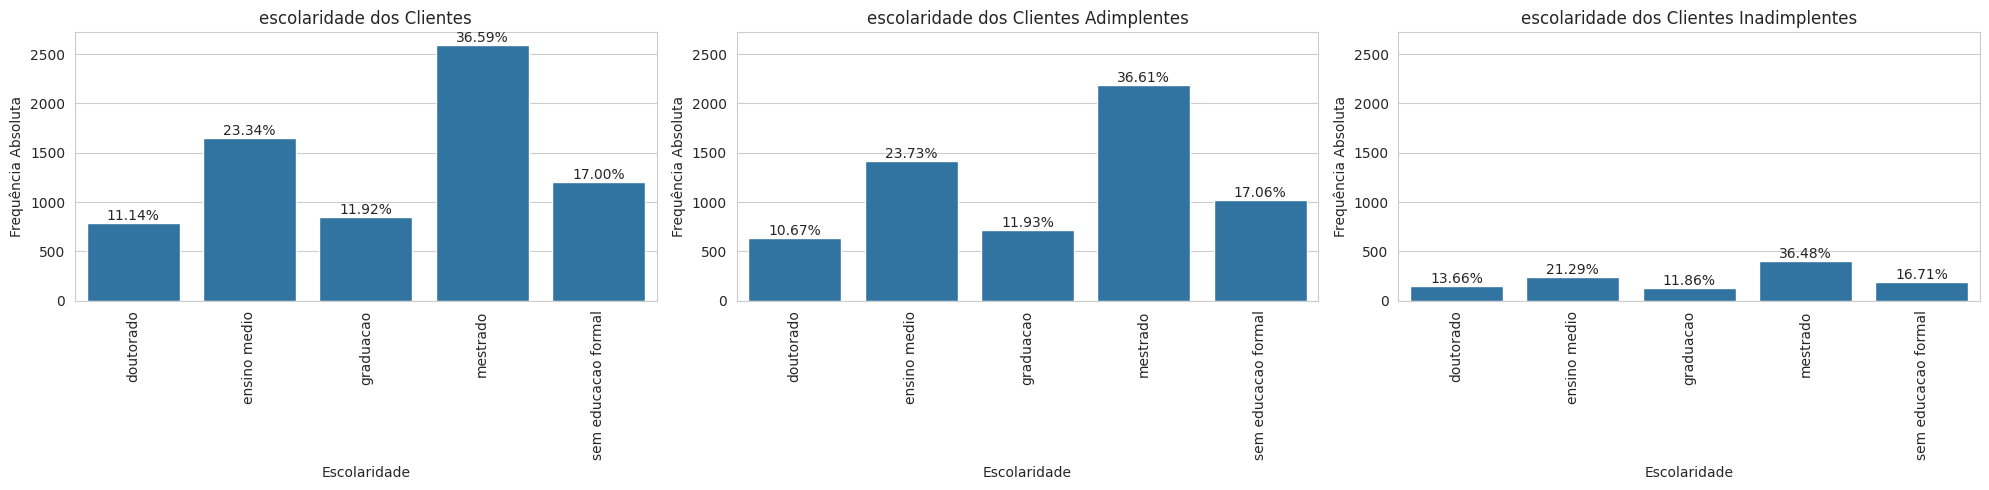

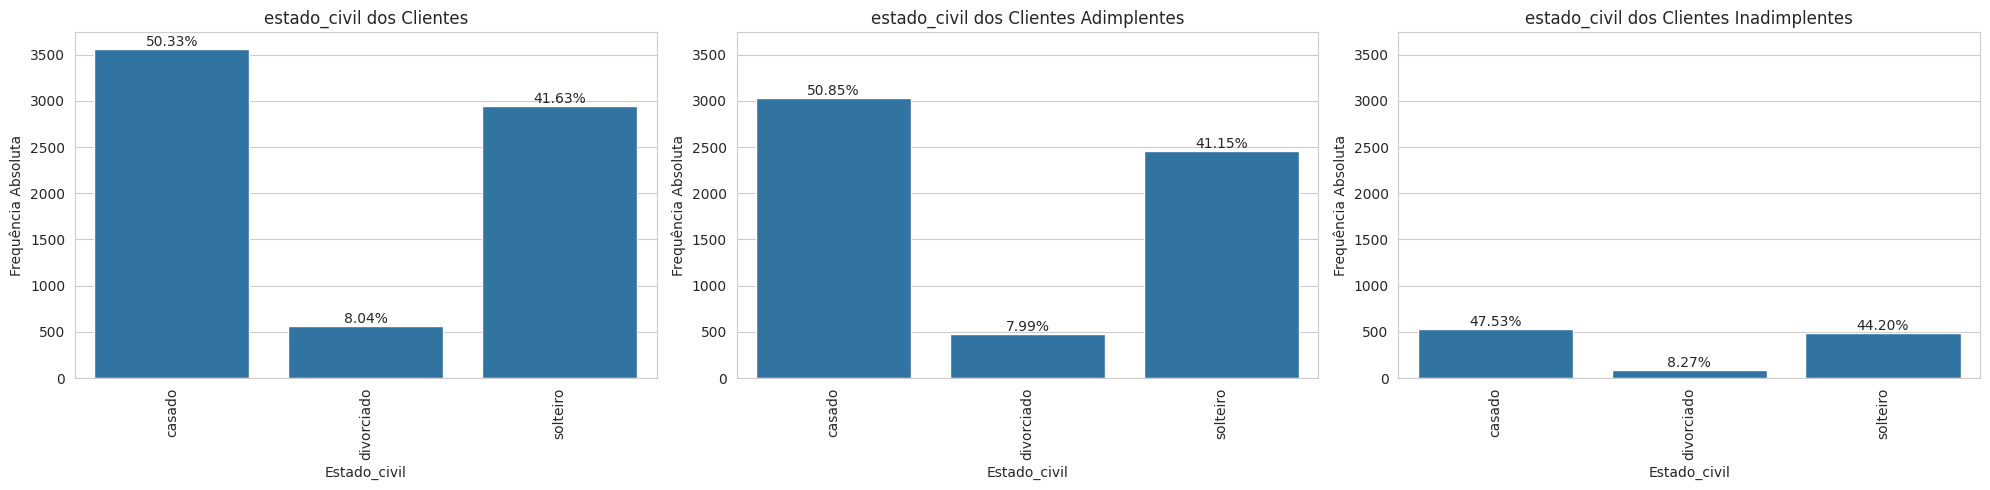

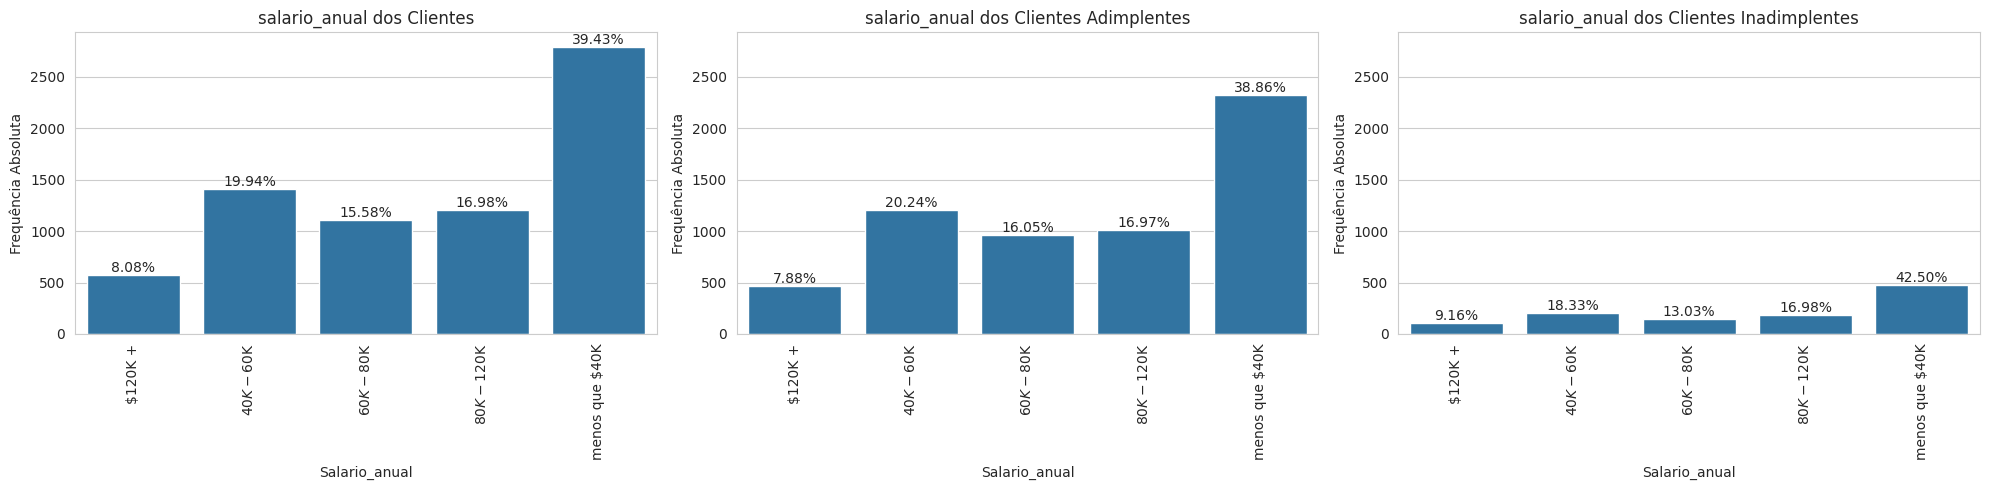

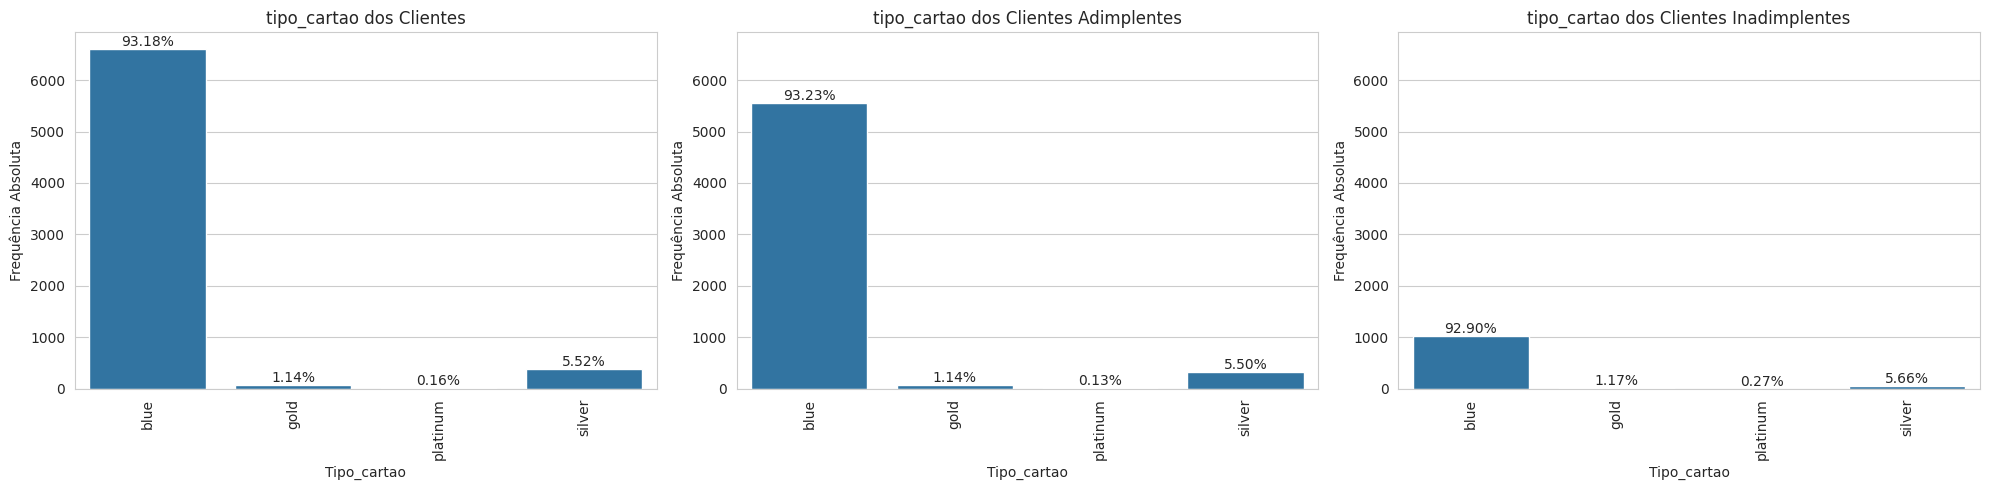

In [ ]:
dfs = [df_dropados, df_adimplente, df_inadimplente]

for c in categorical_columns:
  coluna = c
  t1 = c+' dos Clientes'
  t2 = c+' dos Clientes Adimplentes'
  t3= c+' dos Clientes Inadimplentes'
  titulos = [t1, t2, t3]
  plotar_grafico_por_coluna(dfs, coluna, titulos)
  print()

### Dados numéricos

In [ ]:
numerical_columns_hist = [coluna for coluna in df_dropados.drop(['id', 'default'], axis=1).select_dtypes('number').columns if '_12m' in coluna]
numerical_columns = [coluna for coluna in df_dropados.drop(['id', 'default'], axis=1).select_dtypes('number').columns if '_12m' not in coluna]

In [ ]:
def plotar_histograma_por_coluna(df, coluna, titulos):
    eixo = 0
    max_y = 0
    figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

    for dataframe, titulo in zip(df, titulos):
        f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
        f.set(title=titulo, xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        eixo += 1

    figura.show()

 - Quantidade de Transações nos Últimos 12 Meses

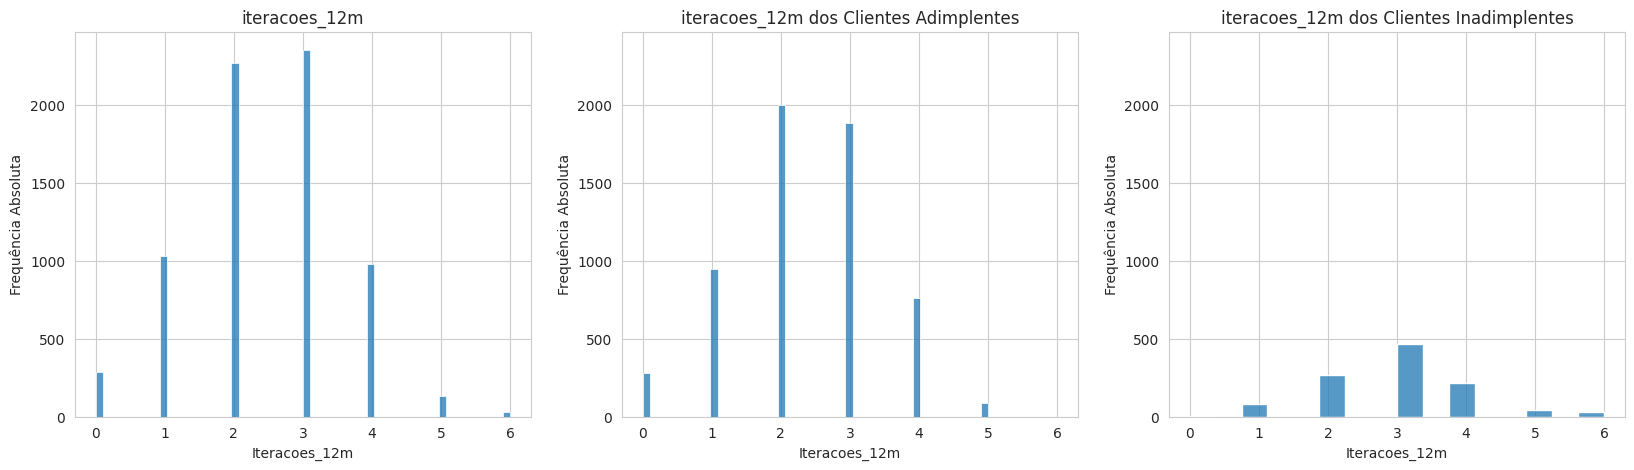

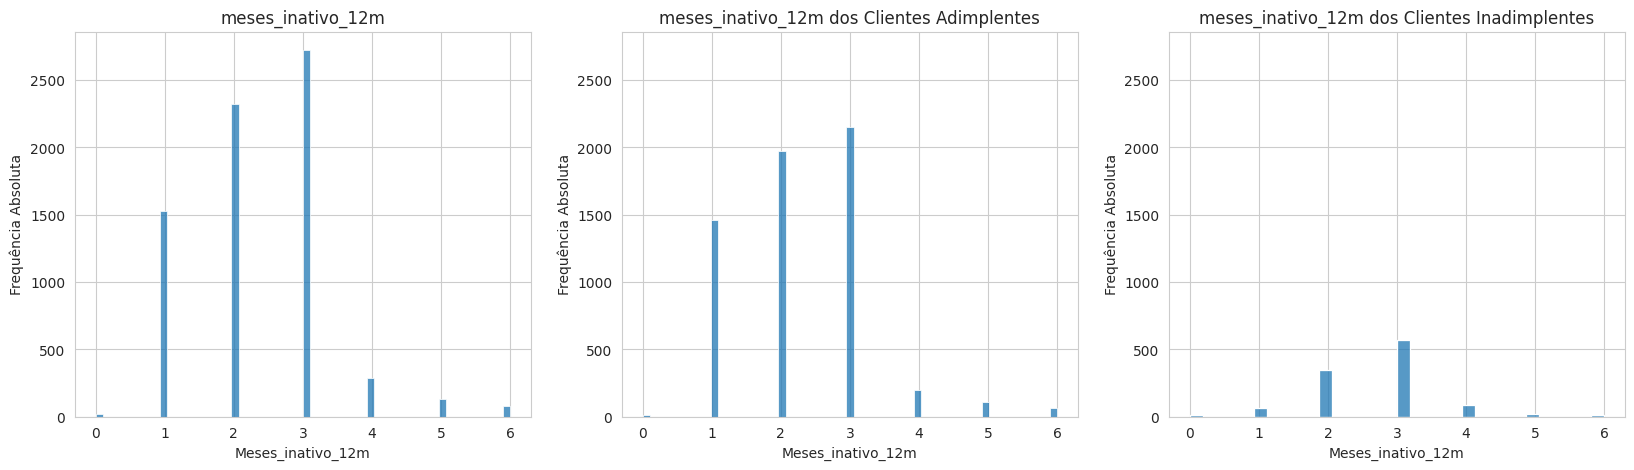

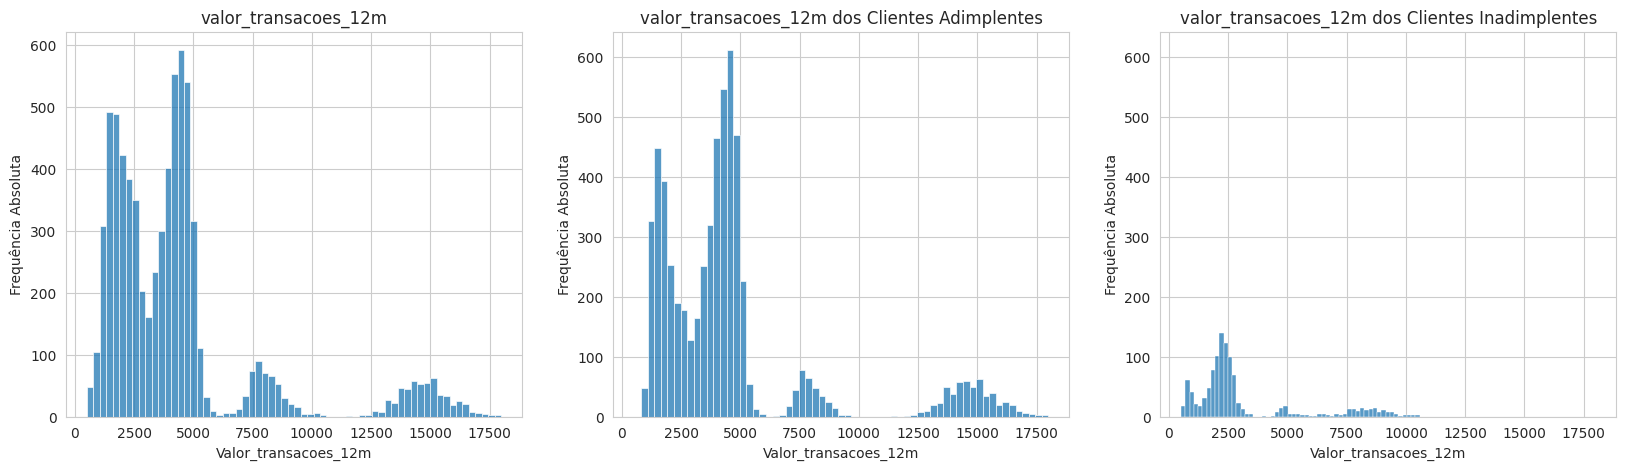

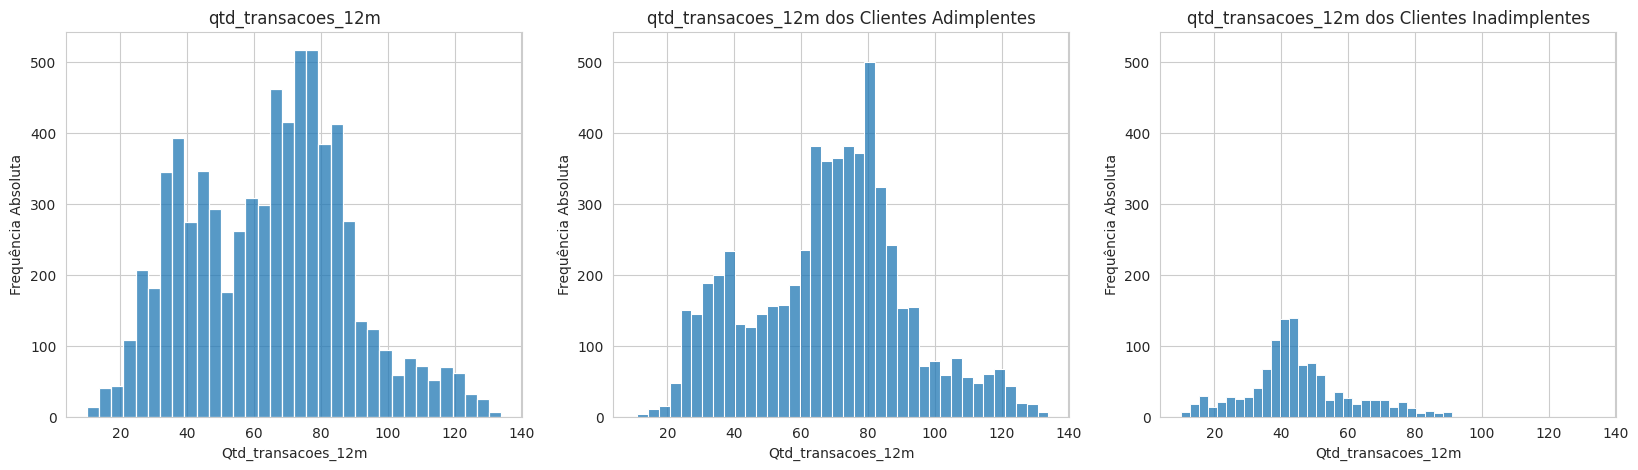

In [ ]:
for c in numerical_columns_hist:
  coluna = c
  t1 = c
  t2 = c+' dos Clientes Adimplentes'
  t3= c+' dos Clientes Inadimplentes'
  titulos = [t1, t2, t3]
  plotar_histograma_por_coluna(dfs, coluna, titulos)
  print()

In [ ]:
def plotar_boxplot_por_coluna(df, coluna, titulos):
    eixo = 0
    max_y = 0
    figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

    for dataframe, titulo in zip(df, titulos):
        sns.violinplot(x=coluna, data=dataframe, ax=eixos[eixo])
        eixos[eixo].set(title=titulo, xlabel=coluna.capitalize())

        eixo += 1

    figura.tight_layout()
    plt.show()

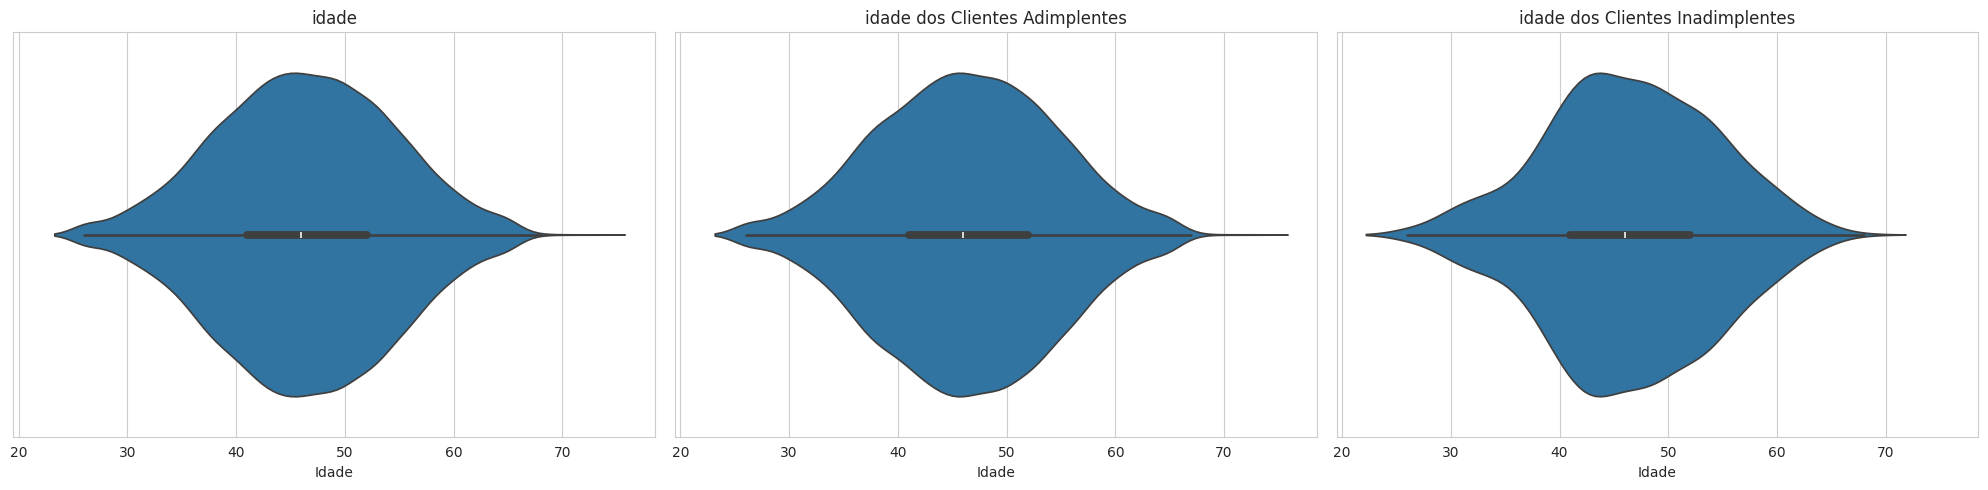

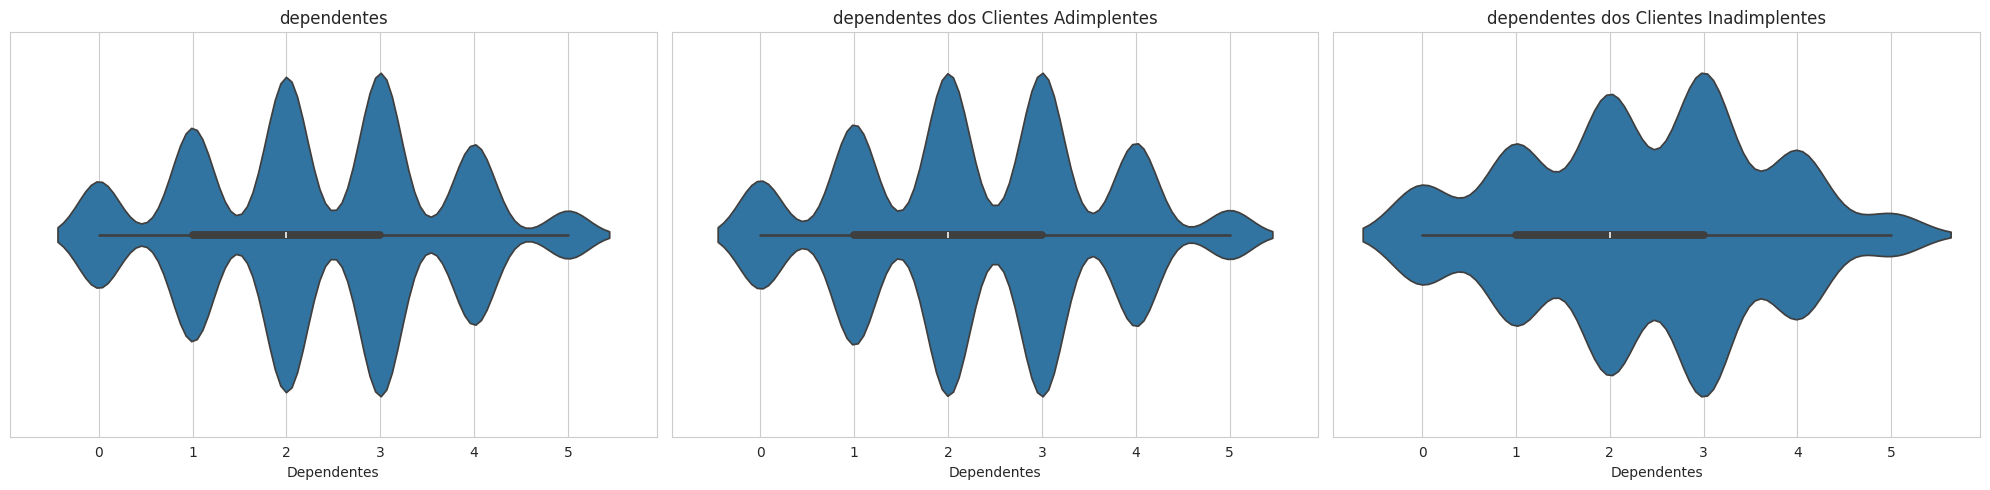

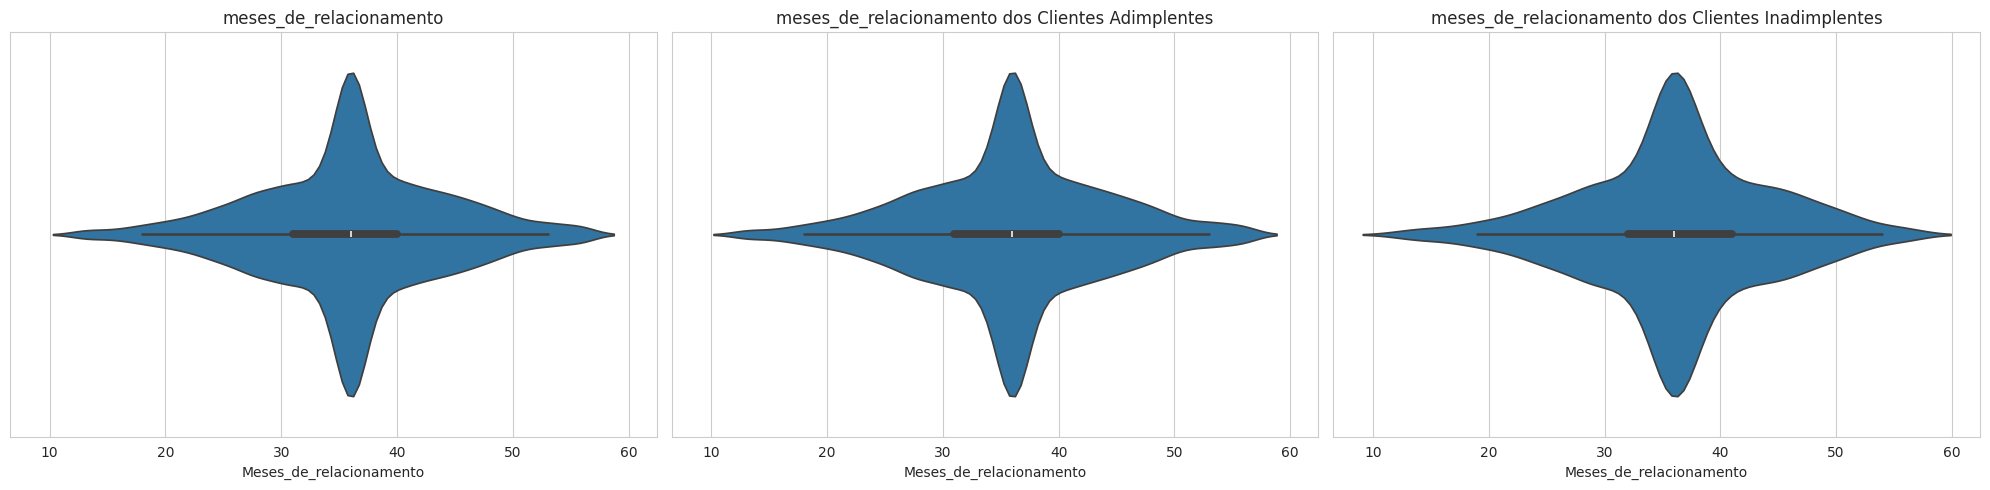

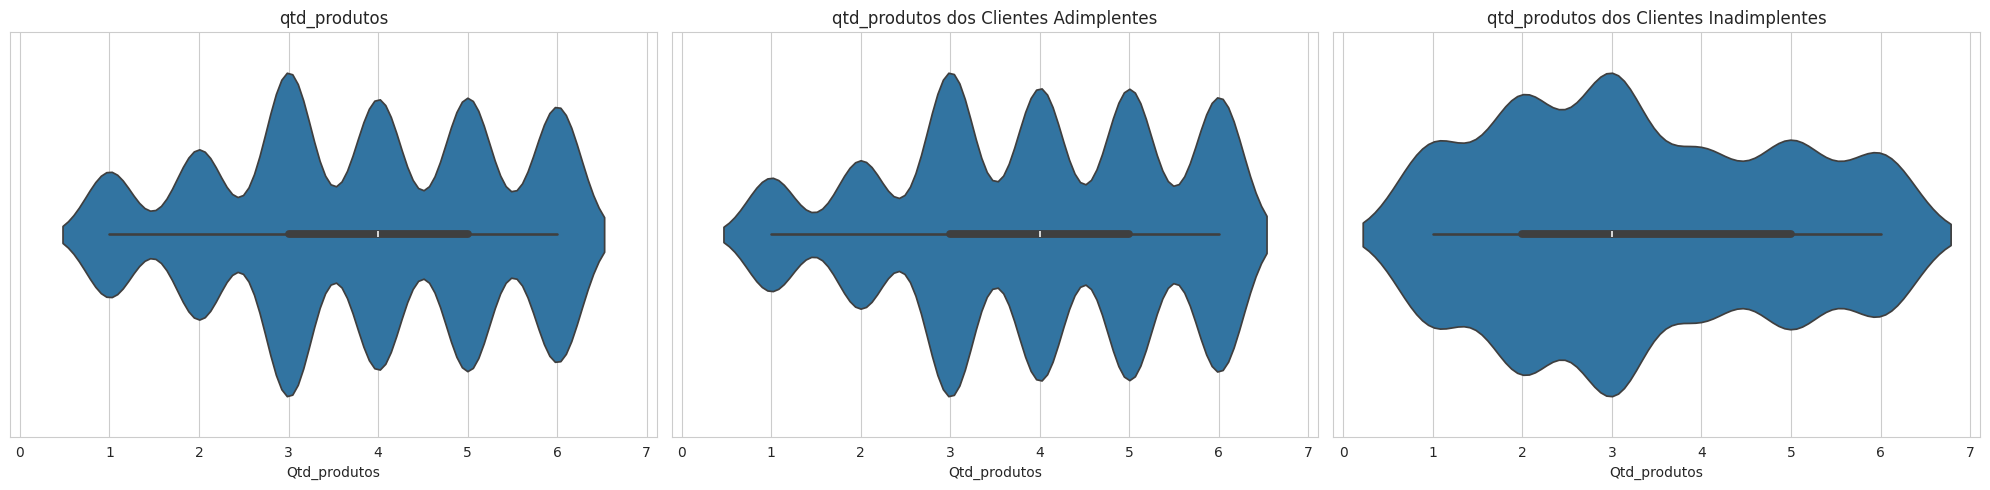

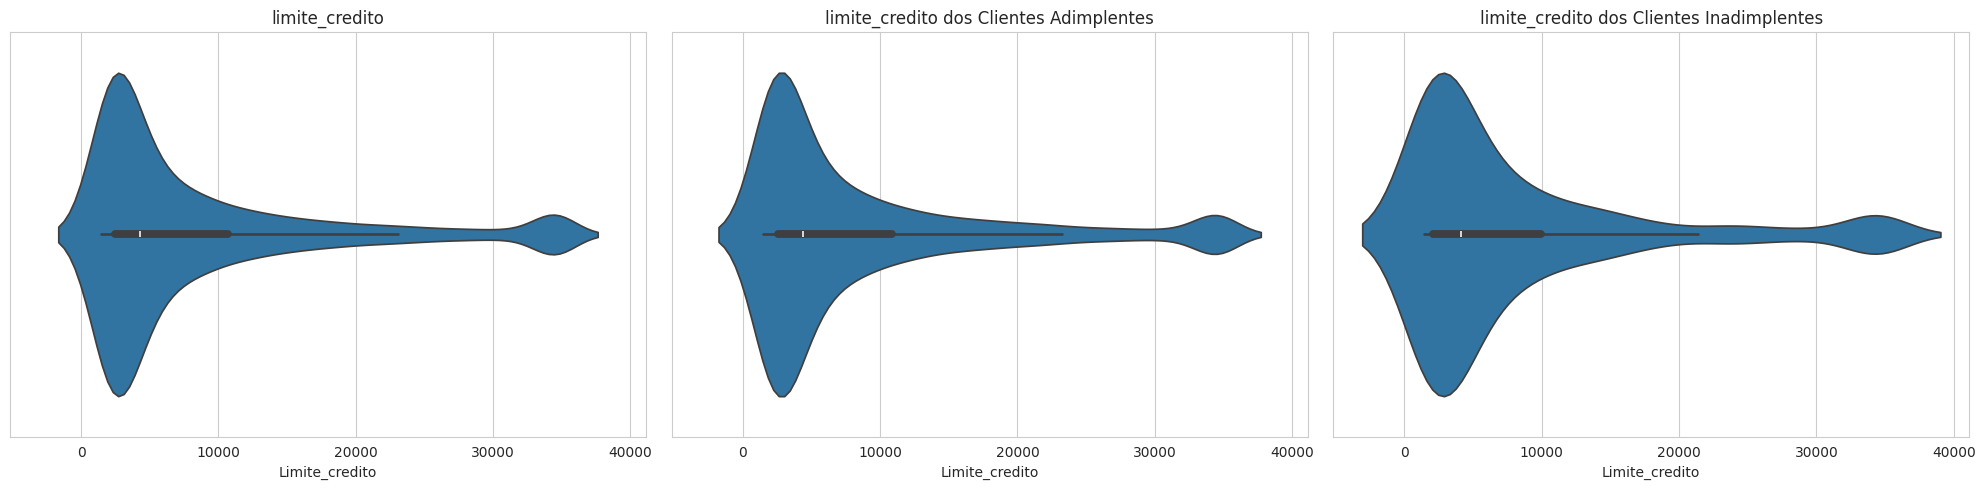

In [ ]:
for c in numerical_columns:
  coluna = c
  t1 = c
  t2 = c+' dos Clientes Adimplentes'
  t3= c+' dos Clientes Inadimplentes'
  titulos = [t1, t2, t3]
  plotar_boxplot_por_coluna(dfs, coluna, titulos)
  print()

In [ ]:
df_dropados.columns

Index(['id', 'default', 'idade', 'sexo', 'dependentes', 'escolaridade',
       'estado_civil', 'salario_anual', 'tipo_cartao',
       'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m',
       'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m',
       'qtd_transacoes_12m'],
      dtype='object')

 - Valor das Transações nos Últimos 12 Meses

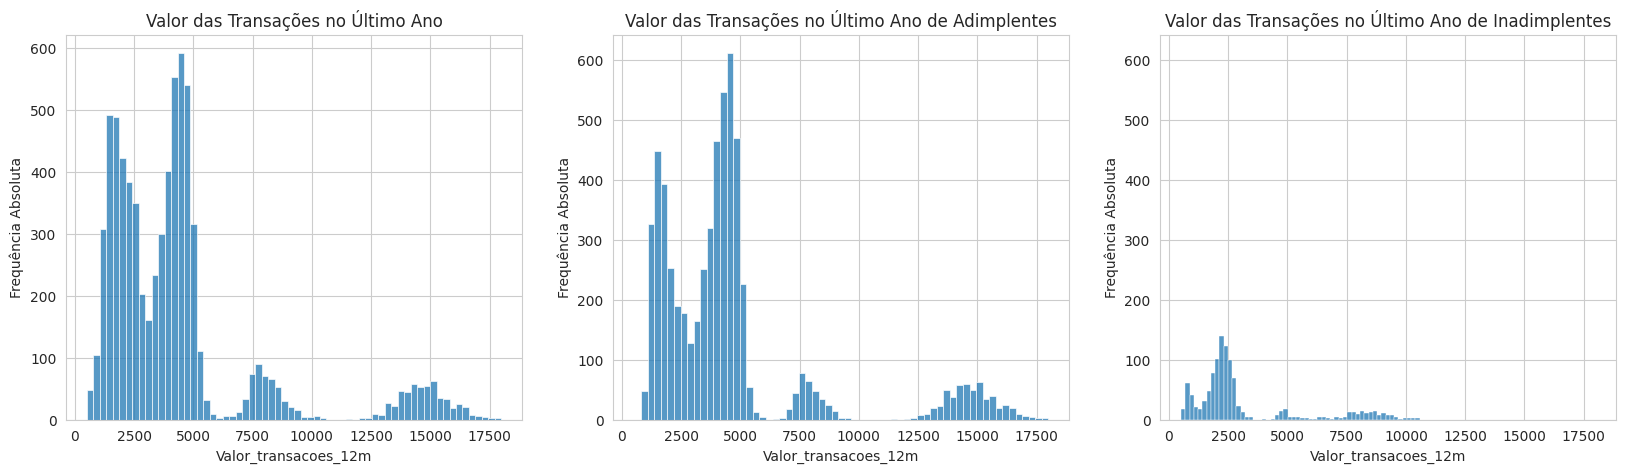

In [ ]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df_dropados, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

## <a name="7">Análise Bivariada</a>
[Voltar ao Topo](#voltar)

* Correlação

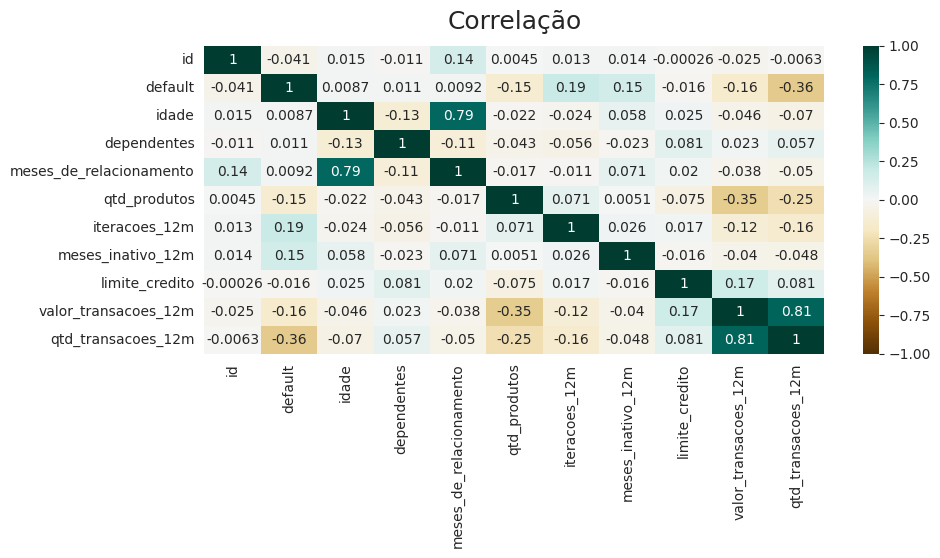

In [ ]:
plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(df_dropados.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

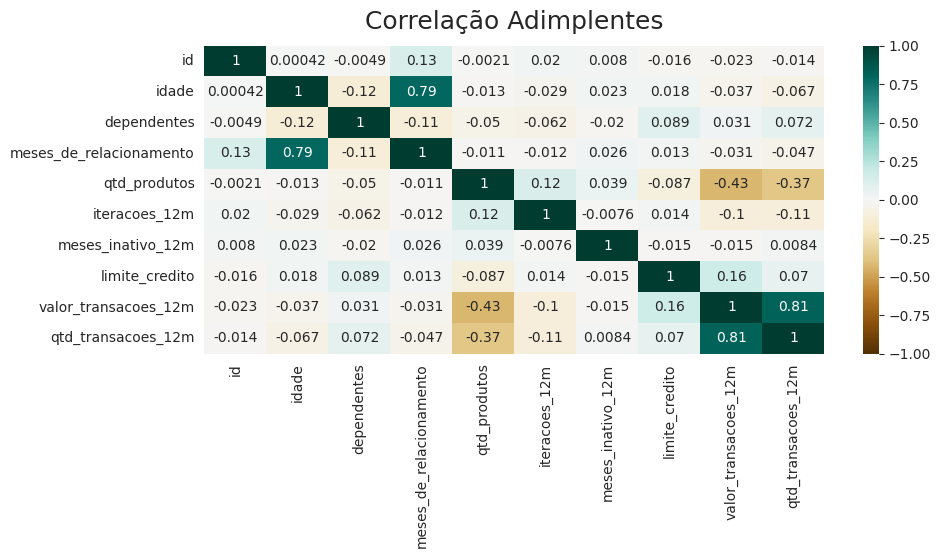

In [ ]:
plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(df_adimplente.drop('default', axis=1).corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação Adimplentes', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

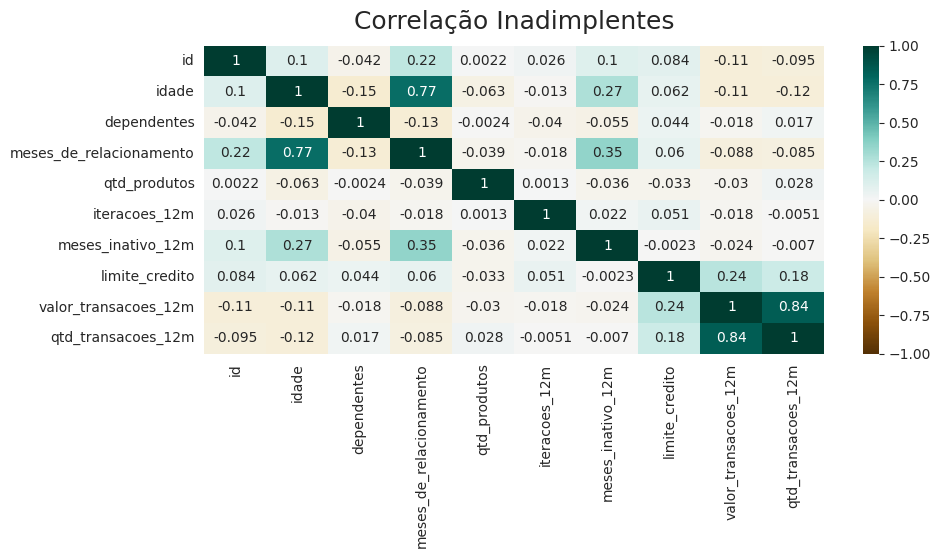

In [ ]:
plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(df_inadimplente.drop('default', axis=1).corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação Inadimplentes', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

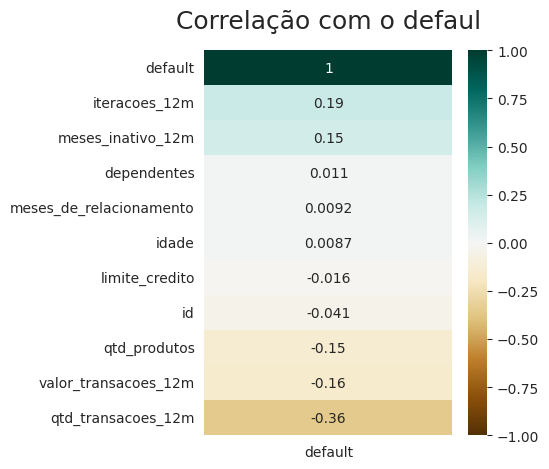

In [ ]:
plt.figure(figsize=(4, 5))
heatmap = sns.heatmap(df_dropados.corr()[['default']].sort_values(by='default', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação com o defaul', fontdict={'fontsize':18}, pad=16);

# <a name="8">Conclusão</a>
[Voltar ao Topo](#voltar)

>A análise do dataset revela que a maioria dos clientes da instituição são adimplentes, indicando um bom comportamento de pagamento no geral. Os clientes adimplentes tendem a ter uma média de produtos contratados, valor total de transações, quantidade de transações e limite de crédito maior em comparação com os inadimplentes. Ao passo que os inadimplentes tendem a ter a quantidade de interações e meses inativos superior. 

>Além disso,observou-se forte correlação positiva com valor e quantidade das transações, sugerindo que quanto mais o cliente transaciona maior será o valor das transações. Forte correlação positiva entre idade e tempo de relacionamento, sugerindo que quanto mais velho o cliente mais fiel ele se torna.

>De maneira geral embora haja diferenças nas características entre os clientes adimplentes e inadimplentes, essas diferenças não são tão proeminentes para explicar a inadimplência apenas com base nessas variáveis.
